# PSO program: Filter Wheel 25cm magnetic field calculation

### Yako Irusta Salles
### Email: yakoirusta@correo.ugr.es

Python written program that calculates magnetic moments and position of dipoles based on PSO Algorithm
Using magnetic fields measurements from the MCF Ulysses we compute the PSO algorithm to find the
optimum vaule of position and magnetic moments of the dipole used. 



To use this program it is necessary that you have already installed the library that calculates the PSO algorithm made by Joaquín Amat Rodrigo. You can check the Github code [here](https://github.com/JoaquinAmatRodrigo/optimizacion_PSO_python.git)

In [79]:
# Installation of the PSO library used in this program

!git clone https://github.com/JoaquinAmatRodrigo/optimizacion_PSO_python.git
    
#Cloning into 'optimizacion_PSO_python'...    

fatal: destination path 'optimizacion_PSO_python' already exists and is not an empty directory.


In [121]:
## Libraries used in this program.
# -) Numpy library: Used to work easily with arrays and math operators.
# -) Math library: Basic math library with the fundamental math operators.
# -) Matplolib library: Python libary used to plot data and make good-looking graphs.
import numpy as np
from numpy import random
import math 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from plotly.subplots import make_subplots

#PSO_python: Library made by Joaquín Amat Rodrigo used to compute the PSO algorithm.
#Enjambre class: Class that computes the algorithm for the swarm made.
#Particula class: Class the computes the algoritim for each individual particle in the swarm.
from PSO_python import Enjambre
from PSO_python import Particula

For our program we will need the magnetic measurements from the MCF and upload it to our code.

In [122]:
## File with the position of the magnetometers used to measure the magnetic field in the MCF.
#We used 4 magnetometers for the measurements. Posicion_Magnetometro_TCS.txt file data has the following values: 
#Posicion magnetometro 2[x,y,z] [cm]
#    26.7   -5.4   13.5
#Posicion magnetometro 3[x,y,z] [cm]
#    26.7    0.0   3.5
#Posicion magnetometro 4[x,y,z] [cm]
#    22.4   -5.4   -9.7
File_Data="./READ_DATA_FILES/Posicion_Magnetometro_TCS.txt"

In [123]:
## Files with the magnetic field measured in the MCF for the magnetometers 2,3 and 4. The files have the following data:
#Column 1: Phi angle. From 0.0 to 359.0 in steps of 1.
#Column 2: Magnetic field in the X axis in nanoTeslas [nT].
#Column 3: Magnetic field in the Y axis in nanoTeslas [nT].
#Column 4: Magnetic field in the Z axis in nanoTeslas [nT].
#Column 5: Magnetic field modulus in nanoTeslas [nT].

#READ files: File_Data_7, File_Data_8, File_Data_8
#WRITE files: File_Data_10
File_Data_7="./READ_DATA_FILES/Magnetometer2_Measured_Magnetic_Field_v1.txt"
File_Data_8="./READ_DATA_FILES/Magnetometer3_Measured_Magnetic_Field_v1.txt"
File_Data_9="./READ_DATA_FILES/Magnetometer4_Measured_Magnetic_Field_v1.txt"
File_Data_10="./OUTPUT_DATA_FILES/Resultados_pos-mom_PSO_Magnetometro.txt"

In [124]:
## READ: We read the positions of the magnetometres 2, 3 and 4. Values stored in a numpy array. 
posicion_magnetometro_2=np.loadtxt(File_Data,skiprows=0,max_rows=1,comments='#')
posicion_magnetometro_3=np.loadtxt(File_Data,skiprows=2,max_rows=1,comments='#')
posicion_magnetometro_4=np.loadtxt(File_Data,skiprows=4,max_rows=1,comments='#')
print('Magnetometer 2 position: ', end="")
print(posicion_magnetometro_2, end="")
print('cm')
print('Magnetometer 3 position: ', end="")
print(posicion_magnetometro_3, end="")
print('cm')
print('Magnetometer 4 position: ', end="")
print(posicion_magnetometro_4, end="")
print('cm')

Magnetometer 2 position: [26.7 -5.4 13.5]cm
Magnetometer 3 position: [26.7  0.   3.5]cm
Magnetometer 4 position: [22.4 -5.4 -9.7]cm


In [125]:
## READ: We read the magnetic field measured (Bx,By,Bz) by the magnetometer 2 with position (26.7,-5.4,13.5)[cm]
#Values stored in a numpy array. Dimension (360x1)
Bx_meas21=np.loadtxt(File_Data_7, usecols=[1])
By_meas21=np.loadtxt(File_Data_7, usecols=[2])
Bz_meas21=np.loadtxt(File_Data_7, usecols=[3])
Bx_meas22=np.loadtxt(File_Data_7, usecols=[4])
By_meas22=np.loadtxt(File_Data_7, usecols=[5])
Bz_meas22=np.loadtxt(File_Data_7, usecols=[6])
#READ: We read the magnetic field measured (Bx,By,Bz) by the magnetometer 3 with position (26.7,0.0,3.5)[cm]
#Values stored in a numpy array. Dimension (360x1)
Bx_meas31=np.loadtxt(File_Data_8, usecols=[1])
By_meas31=np.loadtxt(File_Data_8, usecols=[2])
Bz_meas31=np.loadtxt(File_Data_8, usecols=[3])
Bx_meas32=np.loadtxt(File_Data_8, usecols=[4])
By_meas32=np.loadtxt(File_Data_8, usecols=[5])
Bz_meas32=np.loadtxt(File_Data_8, usecols=[6])
#READ: We read the magnetic field measured (Bx,By,Bz) by the magnetometer 4 with position (22.4,-5.4,-9.7)[cm]
#Values stored in a numpy array. Dimension (360x1)
Bx_meas41=np.loadtxt(File_Data_9, usecols=[1])
By_meas41=np.loadtxt(File_Data_9, usecols=[2])
Bz_meas41=np.loadtxt(File_Data_9, usecols=[3])
Bx_meas42=np.loadtxt(File_Data_9, usecols=[4])
By_meas42=np.loadtxt(File_Data_9, usecols=[5])
Bz_meas42=np.loadtxt(File_Data_9, usecols=[6])

In [126]:
#READ: We read the array phi that has values from 0.0 until 359.0 degrees. 
ϕ=np.loadtxt(File_Data_7, usecols=[0])
#Our calculus for the angles have to be in radians, so we change from degrees to radians 
ϕ2=ϕ*math.pi/180.0
#We define an array phi1 made of ones and has the same dimensions as the array phi2 for later use. 
length=len(ϕ2)
ϕ1=np.ones(length)

It is necessary to do our calculations in the SI units so we will work in Teslas. The relation between Teslas and nanoTeslas is the following: 

$1\left[T\right]=10^{-9}\left[nT\right]$

In [127]:
#Concatenation of vectors by colums:
## Column 1: ϕ angle(Angle of rotation)
## Column 2: Magnetic field measured by magnetometer 2
## Column 2: Magnetic field measured by magnetometer 3
## Column 2: Magnetic field measured by magnetometer 4
Bx_meas=np.column_stack((ϕ,Bx_meas21+Bx_meas22,Bx_meas31+Bx_meas32,Bx_meas41+Bx_meas42))
By_meas=np.column_stack((ϕ,By_meas21+By_meas22,By_meas31+By_meas32,By_meas41+By_meas42))
Bz_meas=np.column_stack((ϕ,Bz_meas21+Bz_meas22,Bz_meas31+Bz_meas32,Bz_meas41+Bz_meas42))

In [128]:
print("    ϕ       |   mag2  |   mag3  |   mag4  | ")
print(Bx_meas[0:10])
#Columns
#Bx magnetic field
#     ϕ(phi)  & Magnetometer 2 & Magnetometer 3 & Magnetometer 4

    ϕ       |   mag2  |   mag3  |   mag4  | 
[[ 1.         22.50413246 67.2437014  84.76761321]
 [ 2.         23.06929321 69.09981014 84.80637838]
 [ 3.         23.57478331 70.84925424 84.81427827]
 [ 4.         24.02064128 72.49052882 84.79087156]
 [ 5.         24.40701739 74.02242943 84.73571764]
 [ 6.         24.73416899 75.44404357 84.64837703]
 [ 7.         25.00245586 76.75474139 84.52841183]
 [ 8.         25.21233536 77.95416553 84.37538621]
 [ 9.         25.3643576  79.04222024 84.18886691]
 [10.         25.4591606  80.01905994 83.96842376]]


In [129]:
print("    ϕ       |   mag2  |   mag3  |   mag4  | ")
print(By_meas[0:10])
#By magnetic field
#Columns
#     ϕ(phi)  & Magnetometer 2 & Magnetometer 3 & Magnetometer 4

    ϕ       |   mag2  |   mag3  |   mag4  | 
[[  1.          13.65316134  33.9301225   -5.83639802]
 [  2.          12.44703904  31.73576854  -8.7020485 ]
 [  3.          11.22908815  29.48054536 -11.55345061]
 [  4.          10.00195574  27.16977412 -14.38746862]
 [  5.           8.76824733  24.80875808 -17.20109629]
 [  6.           7.53052263  22.40276567 -19.99145874]
 [  7.           6.29129174  19.95701458 -22.7558138 ]
 [  8.           5.05301171  17.47665688 -25.49155272]
 [  9.           3.8180835   14.96676533 -28.19620029]
 [ 10.           2.5888493   12.43232067 -30.86741448]]


In [130]:
print("    ϕ       |   mag2  |   mag3  |   mag4  | ")
print(Bz_meas[0:10])
#Bz magnetic field
#Columns
#     ϕ(phi)  & Magnetometer 2 & Magnetometer 3 & Magnetometer 4

    ϕ       |   mag2  |   mag3  |   mag4  | 
[[  1.          49.49389072  41.25809819 -41.56514218]
 [  2.          49.84509907  41.26274376 -41.95921026]
 [  3.          50.18054692  41.2640311  -42.32452133]
 [  4.          50.50043998  41.26212782 -42.66165764]
 [  5.          50.80499984  41.25720885 -42.97121901]
 [  6.          51.09446259  41.24945582 -43.25382025]
 [  7.          51.36907748  41.23905648 -43.5100887 ]
 [  8.          51.62910563  41.22620407 -43.74066183]
 [  9.          51.87481871  41.21109674 -43.94618496]
 [ 10.          52.1064977   41.19393698 -44.12730905]]


We need to find the position of the magnetometers in spherical coordinates so we calculate it with the following expressions:

$R=\sqrt{x^2+y^2+z^2}$

$\theta=arccos \left(\frac{z}{\sqrt{x^2+y^2+z^2}}\right)$

$\phi=arctan\left(\frac{y}{x}\right)$

In [131]:
#We calculate the position of the magnetometer 2 in the spherical system of coordinates. 
# θ => Theta
# ϕ => Phi
R_2=np.sqrt(posicion_magnetometro_2[0]**2.0+posicion_magnetometro_2[1]**2.0+posicion_magnetometro_2[2]**2.0)
θ_2=math.acos(posicion_magnetometro_2[2]/(R_2))
ϕ_2=math.atan(posicion_magnetometro_2[1]/posicion_magnetometro_2[0])

#We calculate the position of the magnetometer 3 in the spherical system of coordinates. 
R_3=np.sqrt(posicion_magnetometro_3[0]**2.0+posicion_magnetometro_3[1]**2.0+posicion_magnetometro_3[2]**2.0)
θ_3=math.acos(posicion_magnetometro_3[2]/(R_3))
ϕ_3=math.atan(posicion_magnetometro_3[1]/posicion_magnetometro_3[0])

#We calculate the position of the magnetometer 4 in the spherical system of coordinates. 
R_4=np.sqrt(posicion_magnetometro_4[0]**2.0+posicion_magnetometro_4[1]**2.0+posicion_magnetometro_4[2]**2.0)
θ_4=math.acos(posicion_magnetometro_4[2]/(R_4))
ϕ_4=math.atan(posicion_magnetometro_4[1]/posicion_magnetometro_4[0])

The magnetometers measure the magnetic field at a constant $R$ and $\theta$, so our set of points to calculate make a circunference of radius $R_{i}$.

<div>
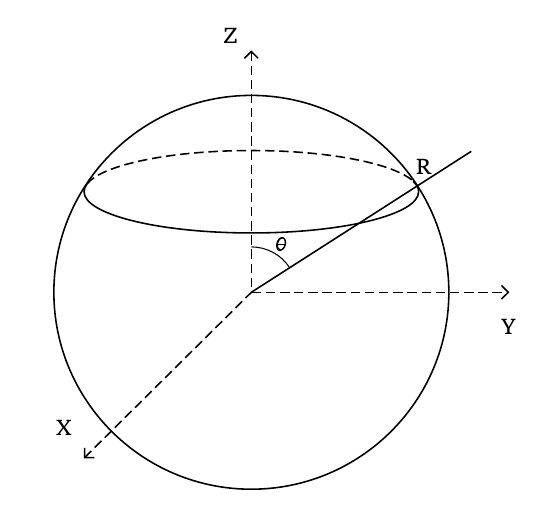

<div>
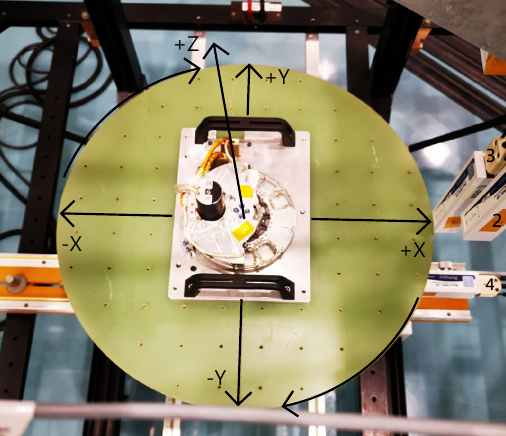
</div>

In [132]:
#We define the cartesian coordinates vector that will travel across the circunference with constant R and theta 
# and change phi. 
#Coordinates for magnetometer 2
X2=R_2*np.sin(θ_2)*np.cos(-ϕ2+ϕ_2)
Y2=R_2*np.sin(θ_2)*np.sin(-ϕ2+ϕ_2)
Z2=R_2*np.cos(θ_2)*ϕ1

#Coordinates for magnetometer 3
X3=R_3*np.sin(θ_3)*np.cos(-ϕ2+ϕ_3)
Y3=R_3*np.sin(θ_3)*np.sin(-ϕ2+ϕ_3)
Z3=R_3*np.cos(θ_3)*ϕ1

#Coordinates for magnetometer 4
X4=R_4*np.sin(θ_4)*np.cos(-ϕ2+ϕ_4)
Y4=R_4*np.sin(θ_4)*np.sin(-ϕ2+ϕ_4)
Z4=R_4*np.cos(θ_4)*ϕ1

Text(0.5, 0, 'Y [cm]')

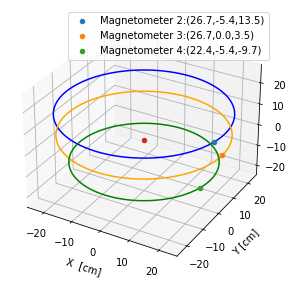

In [133]:
ax = plt.axes(projection ='3d')
ax.plot3D(X2, Y2, Z2, 'blue')
ax.plot3D(X3, Y3, Z3, 'orange')
ax.plot3D(X4, Y4, Z4, 'green')

ax.scatter(X2[359], Y2[359], Z2[0], label='Magnetometer 2:(26.7,-5.4,13.5)')
ax.scatter(X3[359], Y3[359], Z3[0], label='Magnetometer 3:(26.7,0.0,3.5)')
ax.scatter(X4[359], Y4[359], Z4[0], label='Magnetometer 4:(22.4,-5.4,-9.7)')
ax.scatter(0,0,0)
plt.legend(loc='upper right')
plt.grid()
plt.xlim([-25,25])
plt.ylim([-25,25])
plt.margins(1,1,0.60)
plt.tight_layout()
plt.xlabel('X  [cm]')
plt.ylabel('Y [cm]')

In [134]:
#Concatenation of vectors by colums:
## Column 1: ϕ angle(Angle of rotation)
## Column 2: Magnetic field measured by magnetometer 2
## Column 2: Magnetic field measured by magnetometer 3
## Column 2: Magnetic field measured by magnetometer 3
X=np.column_stack((ϕ,X2,X3,X4))
Y=np.column_stack((ϕ,Y2,Y3,Y4))
Z=np.column_stack((ϕ,Z2,Z3,Z4))

In [135]:
print("      ϕ      |    X2     |     X3    |     X4     | ")
print(X[0:10])
#Columns
#X position coordenate
#     ϕ(phi)  & Magnetometer 2 & Magnetometer 3 & Magnetometer 4

      ϕ      |    X2     |     X3    |     X4     | 
[[ 1.         26.60169047 26.69593346 22.30234538]
 [ 2.         26.4952778  26.68373508 22.19789724]
 [ 3.         26.38079441 26.66340858 22.08668741]
 [ 4.         26.25827518 26.63496014 21.96874977]
 [ 5.         26.12775743 26.59839844 21.84412023]
 [ 6.         25.9892809  26.55373461 21.71283675]
 [ 7.         25.84288779 26.50098225 21.57493934]
 [ 8.         25.68862269 26.44015744 21.43046999]
 [ 9.         25.52653258 26.37127869 21.27947272]
 [10.         25.35666685 26.29436701 21.12199351]]


In [136]:
print("      ϕ      |    X2     |     X3    |     X4     | ")
print(Y[0:10])
#Columns
#Y position coordenate
#     ϕ(phi)  & Magnetometer 2 & Magnetometer 3 & Magnetometer 4

      ϕ      |    X2     |     X3    |     X4     | 
[[ 1.         -5.86515681 -0.46597925 -5.79011146]
 [ 2.         -6.32852703 -0.93181656 -6.17845919]
 [ 3.         -6.78996952 -1.39737003 -6.56492491]
 [ 4.         -7.24934372 -1.86249785 -6.94939088]
 [ 5.         -7.7065097  -2.32705833 -7.33174001]
 [ 6.         -8.1613282  -2.79090997 -7.71185581]
 [ 7.         -8.61366069 -3.25391147 -8.08962251]
 [ 8.         -9.06336937 -3.7159218  -8.46492503]
 [ 9.         -9.51031726 -4.17680022 -8.83764906]
 [10.         -9.95436821 -4.63640634 -9.20768105]]


In [137]:
print("      ϕ      |    X2     |     X3    |     X4     | ")
print(Z[0:10])
#Columns
#Z position coordenate
#     ϕ(phi)  & Magnetometer 2 & Magnetometer 3 & Magnetometer 4

      ϕ      |    X2     |     X3    |     X4     | 
[[ 1.  13.5  3.5 -9.7]
 [ 2.  13.5  3.5 -9.7]
 [ 3.  13.5  3.5 -9.7]
 [ 4.  13.5  3.5 -9.7]
 [ 5.  13.5  3.5 -9.7]
 [ 6.  13.5  3.5 -9.7]
 [ 7.  13.5  3.5 -9.7]
 [ 8.  13.5  3.5 -9.7]
 [ 9.  13.5  3.5 -9.7]
 [10.  13.5  3.5 -9.7]]


We need to definde the dipole approximation formula to calculate the magnetic field:

Comentar variables:

$\textbf{m}$: Magnetic moment vector with components $m_x$, $m_y$ and $m_z$.

$\textbf{r}$: Position vector modulus defined as $r=\sqrt{(x-x_0)^2+(y-y_0)^2+(z-z_0)^2}$.

$x_0$, $y_0$, $z_0$: Initial position of the dipole.
Units: 

$\left[ r \right]$=$m$

$\left[ m \right]$=$Am^2$


$\textbf{B}_x=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(x-x_0)}{r^5}-\dfrac{m_x}{r^3}\right) $

$\textbf{B}_y=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(y-y_0)}{r^5}-\dfrac{m_y}{r^3}\right) $

$\textbf{B}_z=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(z-z_0)}{r^5}-\dfrac{m_z}{r^3}\right) $

In [138]:
############################################################################################################################
#FUNCTION: Magnetic_Field
# -) IN variables:
#    # -) R: Modulus of the vector position. R=\sqrt((x-x0)^2+(y-y0)^2+(z-z0)^2).
#    # -) mx, my, mz: Magnetic moments for the x, y and z components.
#    # -) mR: Scalar product between R and m(vector). mR=mx*(x-x0)+my*(y-y0)+mz*(z-z0).
#    # -) x0, y0, z0: Initial position of the dipole.
# -) OUT variables: 
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation seen above
############################################################################################################################
def Magnetic_Field(R,mx,my,mz,mR,x0,y0,z0):
    
    μ=4.0*math.pi*1e-7
    k=μ/(4.0*math.pi)
    
    Bx_PSO=k*(((3.0*mR*(X-x0))/R**5)-(mx/R**3))*1e12 #[nT]
    By_PSO=k*(((3.0*mR*(Y-y0))/R**5)-(my/R**3))*1e12 #[nT]
    Bz_PSO=k*(((3.0*mR*(Z-z0))/R**5)-(mz/R**3))*1e12 #[nT]
    
    return Bx_PSO,By_PSO,Bz_PSO

We define the two fitness functions used in this program to optimize our values calculated with the PSO:

 -Fitness Function 1: 

$F_1=\dfrac{\sqrt{\sum_{i=0}^{M-1}\left[\left(B_{x}^{(meas)}\left[i\right]-B_{x}^{(PSO)}\left[i\right]\right)^2+\left(B_{y}^{(meas)}\left[i\right]-B_{y}^{(PSO)}\left[i\right]\right)^2+\left(B_{z}^{(meas)}\left[i\right]-B_{z}^{(PSO)}\left[i\right]\right)^2\right]}}{\sqrt{\sum_{i=0}^{M-1}\left[\left(B_{x}^{(meas)}\left[i\right]\right)^2+\left(B_{y}^{(meas)}\left[i\right]\right)^2+\left(B_{z}^{(meas)}\left[i\right]\right)^2\right]}}$

-Fitness Function 2: 

$F_2=\dfrac{\sum_{i=0}^{M-1}\left(B_{x}^{(meas)}\left[i\right]-B_{x}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{x}^{(meas)}\left[i\right]\right)^2}+\dfrac{\sum_{i=0}^{M-1}\left(B_{y}^{(meas)}\left[i\right]-B_{y}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{y}^{(meas)}\left[i\right]\right)^2}+\dfrac{\sum_{i=0}^{M-1}\left(B_{z}^{(meas)}\left[i\right]-B_{z}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{z}^{(meas)}\left[i\right]\right)^2}$

-Fitness Function: 

$F^{(n)}=F_{2}^{(n)}\left(\dfrac{F_{2}^{(n-1)}}{F_{1}^{(n-1)}}\right)+F_{1}^{(n)}\left(\dfrac{F_{1}^{(n-1)}}{F_{2}^{(n-1)}}\right)$

In [139]:
############################################################################################################################
#FUNCTION: FitnessFunction1
# -) IN variables:
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation calculated with the function Magnetic_Field
#  
# -) OUT variables: 
#    # -) F1: Value of the fitness function 1 calculated with the function shown
############################################################################################################################
def FitnessFunction_F1(Bx_PSO,By_PSO,Bz_PSO):
    
    length=len(Bx_meas)-1    
    sum_num_B=np.zeros(3)
    sum_den_B=np.zeros(3)
    
    for i in range(1,3):
        for j in range(0,length):
            sum_num_B[i]=sum_num_B[i]+((Bx_meas[j,i]-Bx_PSO[j,i])**2.0+(By_meas[j,i]-By_PSO[j,i])**2.0+(Bz_meas[j,i]-Bz_PSO[j,i])**2.0)
            sum_den_B[i]=sum_den_B[i]+(Bx_meas[j,i]**2.0+By_meas[j,i]**2.0+Bz_meas[j,i]**2.0)
    
    F1=np.sqrt(sum_num_B/sum_den_B)
    
    return F1

In [140]:
############################################################################################################################
#FUNCTION: FitnessFunction2
# -) IN variables:
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation calculated with the function Magnetic_Field
#  
# -) OUT variables: 
#    # -) F1: Value of the fitness function 2 calculated with the function shown
############################################################################################################################
def FitnessFunction_F2(Bx_PSO,By_PSO,Bz_PSO):
    
    length=len(Bx_meas)-1
    sum_num_Bx=np.zeros(3)
    sum_num_By=np.zeros(3)
    sum_num_Bz=np.zeros(3)
    sum_den_Bx=np.zeros(3)
    sum_den_By=np.zeros(3)
    sum_den_Bz=np.zeros(3)
    
    for i in range(1,3):
        for j in range(0,length):
            sum_num_Bx[i]=sum_num_Bx[i]+(Bx_meas[j,i]-Bx_PSO[j,i])**2.0
            sum_num_By[i]=sum_num_By[i]+(By_meas[j,i]-By_PSO[j,i])**2.0
            sum_num_By[i]=sum_num_By[i]+(Bz_meas[j,i]-Bz_PSO[j,i])**2.0
        
            sum_den_Bx[i]=sum_den_Bx[i]+(Bx_meas[j,i])**2.0
            sum_den_By[i]=sum_den_By[i]+(By_meas[j,i])**2.0
            sum_den_Bz[i]=sum_den_Bz[i]+(Bz_meas[j,i])**2.0
        
    xnum_Bx=sum_num_Bx/sum_den_Bx
    xnum_By=sum_num_By/sum_den_By
    xnum_Bz=sum_num_Bz/sum_den_Bz    
        
    F2=xnum_Bx+xnum_By+xnum_Bz
    
    return F2

In [141]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini(x0,y0,z0,mx,my,mz):
    
    global F1_0
    global F2_0
    
    F1_0=random.rand(4)
    F2_0=random.rand(4)
    
    R=np.sqrt((X-x0)**2+(Y-y0)**2+(Z-z0)**2)  
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
  
    Bx,By,Bz=Magnetic_Field(R,mx,my,mz,mR,x0,y0,z0)
    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2[1]*(F2_0[1]/F1_0[1])+F1[1]*(F1_0[1]/F2_0[1])
    
    return F

In [142]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction(x0,y0,z0,mx,my,mz):
    
    global F1_0
    global F2_0
    
    R=np.sqrt((X-x0)**2+(Y-y0)**2+(Z-z0)**2)  
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
   
    Bx,By,Bz=Magnetic_Field(R,mx,my,mz,mR,x0,y0,z0)
    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2[1]*(F2_0[1]/F1_0[1])+F1[1]*(F1_0[1]/F2_0[1])
    F2_0=F2
    F1_0=F1

    return F

In [143]:
#Definition of the swarm used in this program
#SWARM Properties: 
#   # -) Number of particles: 32
#   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
#   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
#   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
pos_value=25
mag_mom_value=20#*1e-3
swarm=Enjambre(
    n_particulas = 32,
    n_variables  = 6,
    limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
    limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
    verbose      = False
)

In [144]:
#We evaluate our swarm created to determine the initial value for the fitness function .
#Optimization: Find minimum value.
swarm.evaluar_enjambre(
    funcion_objetivo=FitnessFunction_Ini,
    optimizacion="minimizar",
    verbose=False
)

<ipython-input-139-c821d18226e3>:20: RuntimeWarning: invalid value encountered in true_divide
  F1=np.sqrt(sum_num_B/sum_den_B)
<ipython-input-140-9499a39f79c5>:29: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bx=sum_num_Bx/sum_den_Bx
<ipython-input-140-9499a39f79c5>:30: RuntimeWarning: invalid value encountered in true_divide
  xnum_By=sum_num_By/sum_den_By
<ipython-input-140-9499a39f79c5>:31: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bz=sum_num_Bz/sum_den_Bz


In [145]:
#Optimization of our swarm.
#Optimization properties: 
#   # -) Function to fit: FitnessFunction.
#   # -) Optimization: Find minimum.
#   # -) Number of itinerations: 700
#   # -) Tolerance: 10**(-7)
swarm.optimizar(
    funcion_objetivo  = FitnessFunction,
    optimizacion      = "minimizar",
    n_iteraciones     = 700,
    inercia           = 1.0,
    reduc_inercia     = True,
    inercia_max       = 1.0,
    inercia_min       = 0.6,
    peso_cognitivo    = 1.5,
    peso_social       = 1.5,
    parada_temprana   = True,
    rondas_parada     = 5,
    tolerancia_parada = 10**-7,
    verbose           = False   
)

#Program running duration estimate: 300s

<ipython-input-139-c821d18226e3>:20: RuntimeWarning: invalid value encountered in true_divide
  F1=np.sqrt(sum_num_B/sum_den_B)
<ipython-input-140-9499a39f79c5>:29: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bx=sum_num_Bx/sum_den_Bx
<ipython-input-140-9499a39f79c5>:30: RuntimeWarning: invalid value encountered in true_divide
  xnum_By=sum_num_By/sum_den_By
<ipython-input-140-9499a39f79c5>:31: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bz=sum_num_Bz/sum_den_Bz


-------------------------------------------
Optimización finalizada 2021-06-13 23:35:41
-------------------------------------------
Duración optimización: 193.30854868888855
Número de iteraciones: 699
Posición óptima: [-0.2674632193217853 -1.908692329645251 4.474534995021214
 5.916275495665119 -5.0376824776296285 -8.912711204381793]
Valor óptimo: 0.2791379672649522



<AxesSubplot:xlabel='Itineration', ylabel='Fitness Function'>

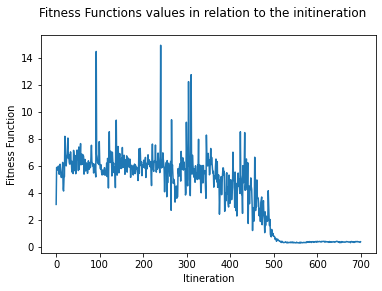

In [146]:
#Plot of the fitness values obtained during the compilation of the program
#X label: Number of itinerations
#Y Label: Fitness values 
figure_fitness_values=plt.figure(figsize=(6,4))
plt.xlabel('Itineration')
plt.grid()
plt.ylabel('Fitness Function')
figure_fitness_values.suptitle('Fitness Functions values in relation to the initineration')
swarm.resultados_df['mejor_valor_enjambre'].plot()

In [147]:
x_0=swarm.posicion_optima[0]
y_0=swarm.posicion_optima[1]
z_0=swarm.posicion_optima[2]

mx_0=swarm.posicion_optima[3]
my_0=swarm.posicion_optima[4]
mz_0=swarm.posicion_optima[5]

print("Optimum position: ", end="")
print(x_0,y_0,z_0)
print("Optimum magnetic moments: ", end="")
print(mx_0,my_0,mz_0)

R=np.sqrt((X-x_0)**2+(Y-y_0)**2+(Z-z_0)**2)  
mR=mx_0*(X-x_0)+my_0*(Y-y_0)+mz_0*(Z-z_0)
    
Bx_PSO1,By_PSO1,Bz_PSO1=Magnetic_Field(R,mx_0,my_0,mz_0,mR,x_0,y_0,z_0)

Optimum position: -0.2674632193217853 -1.908692329645251 4.474534995021214
Optimum magnetic moments: 5.916275495665119 -5.0376824776296285 -8.912711204381793


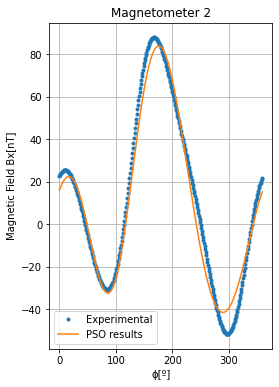

In [151]:
plt.figure(figsize=(4,6))
plt.plot(Bx_meas[:,1], '.', label='Experimental')
plt.plot(Bx_PSO1[:,1] , label='PSO results')
plt.grid()
plt.legend()
plt.title('Magnetometer 2')
plt.xlabel('ϕ[º]')
plt.ylabel('Magnetic Field Bx[nT]')
#plt.xlim([720,180])
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Bx-mg2_Simulation1-v2.svg')
plt.show()

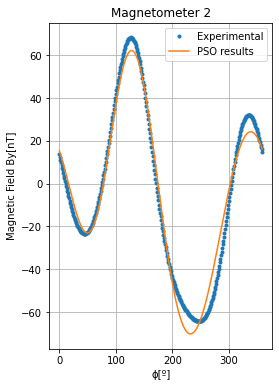

In [152]:
plt.figure(figsize=(4,6))
plt.plot(By_meas[:,1], '.' , label='Experimental')
plt.plot(By_PSO1[:,1] , label='PSO results')
plt.grid()
plt.legend()
plt.title('Magnetometer 2')
plt.xlabel('ϕ[º]')
plt.ylabel('Magnetic Field By[nT]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_By-mg2_Simulation1-v2.svg')
#plt.xlim([720,180])
plt.show()

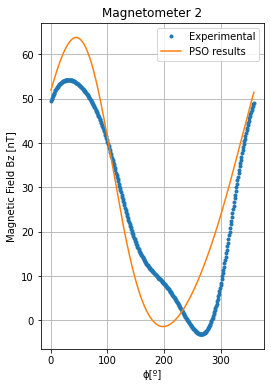

In [153]:
plt.figure(figsize=(4,6))
plt.plot(Bz_meas[:,1], '.' , label='Experimental')
plt.plot(Bz_PSO1[:,1] , label='PSO results')
plt.legend()
plt.grid()
plt.title('Magnetometer 2')
plt.xlabel('ϕ[º]')
plt.ylabel('Magnetic Field Bz [nT]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Bz-mg2_Simulation1-v2.svg')
#plt.xlim([720,180])
plt.show()

# Simulate for a second dipole correction 

In [154]:
Bx_meas=Bx_meas-Bx_PSO1
By_meas=By_meas-By_PSO1
Bz_meas=Bz_meas-Bz_PSO1

In [155]:
#Concatenation of vectors by colums:
## Column 1: ϕ angle(Angle of rotation)
## Column 2: Magnetic field measured by magnetometer 2
## Column 2: Magnetic field measured by magnetometer 3
## Column 2: Magnetic field measured by magnetometer 4
Bx_meas=np.column_stack((ϕ,Bx_meas22,Bx_meas32,Bx_meas42))
By_meas=np.column_stack((ϕ,By_meas22,By_meas32,By_meas42))
Bz_meas=np.column_stack((ϕ,Bz_meas22,Bz_meas32,Bz_meas42))

In [156]:
#Definition of the swarm used in this program
#SWARM Properties: 
#   # -) Number of particles: 32
#   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
#   # -) Lower limit of the variables: [-25,-25,-25(position limits),-20,-20,-20(magnetic moment limits)]
#   # -) Upper limit of the variables: [25,25,25(position limits),20,20,20(magnetic moment limits)]
pos_value=25#*1e-2 
mag_mom_value=20#*1e-3
swarm=Enjambre(
    n_particulas = 32,
    n_variables  = 6,
    limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
    limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
    verbose      = False
)

In [157]:
#We evaluate our swarm created to determine the initial value for the fitness function .
#Optimization: Find minimum value.
swarm.evaluar_enjambre(
    funcion_objetivo=FitnessFunction_Ini,
    optimizacion="minimizar",
    verbose=False
)

<ipython-input-139-c821d18226e3>:20: RuntimeWarning: invalid value encountered in true_divide
  F1=np.sqrt(sum_num_B/sum_den_B)
<ipython-input-140-9499a39f79c5>:29: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bx=sum_num_Bx/sum_den_Bx
<ipython-input-140-9499a39f79c5>:30: RuntimeWarning: invalid value encountered in true_divide
  xnum_By=sum_num_By/sum_den_By
<ipython-input-140-9499a39f79c5>:31: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bz=sum_num_Bz/sum_den_Bz


In [158]:
#Optimization of our swarm.
#Optimization properties: 
#   # -) Function to fit: FitnessFunction.
#   # -) Optimization: Find minimum.
#   # -) Number of itinerations: 700
#   # -) Tolerance: 10**(-7)
swarm.optimizar(
    funcion_objetivo  = FitnessFunction,
    optimizacion      = "minimizar",
    n_iteraciones     = 700,
    inercia           = 1.1,
    reduc_inercia     = True,
    inercia_max       = 1.0,
    inercia_min       = 0.,
    peso_cognitivo    = 1.5,
    peso_social       = 1.5,
    parada_temprana   = True,
    rondas_parada     = 5,
    tolerancia_parada = 10**-7,
    verbose           = False   
)

#Program running duration estimate: 230s

<ipython-input-139-c821d18226e3>:20: RuntimeWarning: invalid value encountered in true_divide
  F1=np.sqrt(sum_num_B/sum_den_B)
<ipython-input-140-9499a39f79c5>:29: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bx=sum_num_Bx/sum_den_Bx
<ipython-input-140-9499a39f79c5>:30: RuntimeWarning: invalid value encountered in true_divide
  xnum_By=sum_num_By/sum_den_By
<ipython-input-140-9499a39f79c5>:31: RuntimeWarning: invalid value encountered in true_divide
  xnum_Bz=sum_num_Bz/sum_den_Bz


-------------------------------------------
Optimización finalizada 2021-06-13 23:40:06
-------------------------------------------
Duración optimización: 195.52999925613403
Número de iteraciones: 699
Posición óptima: [3.814419317368053 2.69560851638707 2.0336506326473276 1.7258024710682989
 -4.738339683977625 -2.4337081015058146]
Valor óptimo: 0.0046636956254579205



<AxesSubplot:xlabel='Itineration', ylabel='Fitness Function'>

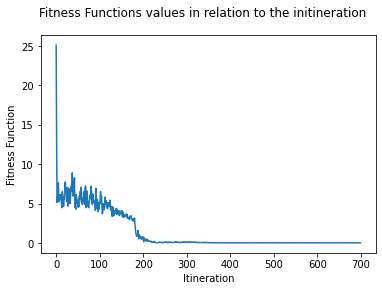

In [159]:
#Plot of the fitness values obtained during the compilation of the program
#X label: Number of itinerations
#Y Label: Fitness values 
figure_fitness_values=plt.figure(figsize=(6,4))
plt.xlabel('Itineration')
plt.ylabel('Fitness Function')
figure_fitness_values.suptitle('Fitness Functions values in relation to the initineration')
swarm.resultados_df['mejor_valor_enjambre'].plot()

In [160]:
x_02=swarm.posicion_optima[0]
y_02=swarm.posicion_optima[1]
z_02=swarm.posicion_optima[2]

mx_02=swarm.posicion_optima[3]
my_02=swarm.posicion_optima[4]
mz_02=swarm.posicion_optima[5]

print("Optimum position: ", end="")
print(x_02,y_02,z_02)
print("Optimum magnetic moments: ", end="")
print(mx_02,my_02,mz_02)

R2=np.sqrt((X-x_02)**2+(Y-y_02)**2+(Z-z_02)**2)  
mR2=mx_02*(X-x_02)+my_02*(Y-y_02)+mz_02*(Z-z_02)
    
Bx_PSO2,By_PSO2,Bz_PSO2=Magnetic_Field(R2,mx_02,my_02,mz_02,mR2,x_02,y_02,z_02)

Optimum position: 3.814419317368053 2.69560851638707 2.0336506326473276
Optimum magnetic moments: 1.7258024710682989 -4.738339683977625 -2.4337081015058146


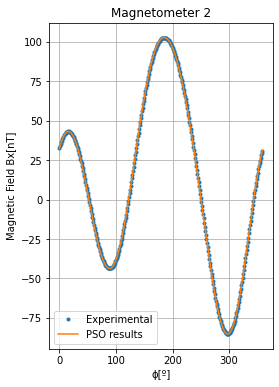

In [186]:
plt.figure(figsize=(4,6))
plt.plot(Bx_meas[:,1]+Bx_PSO1[:,1], '.' , label='Experimental')
plt.plot(Bx_PSO2[:,1]+Bx_PSO1[:,1] , label='PSO results')
plt.grid()
plt.legend()
plt.title('Magnetometer 2')
plt.xlabel('ϕ[º]')
plt.ylabel('Magnetic Field Bx[nT]')
#plt.xlim([720,180])
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Bx-mg2_Simulation2-v2.svg')
plt.show()

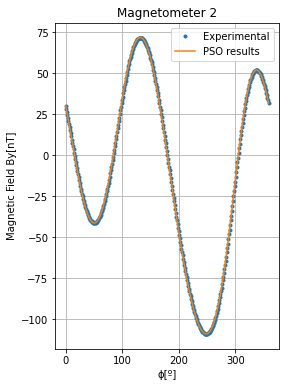

In [187]:
plt.figure(figsize=(4,6))
plt.plot(By_meas[:,1]+By_PSO1[:,1], '.' , label='Experimental')
plt.plot(By_PSO2[:,1]+By_PSO1[:,1], label='PSO results')
plt.grid()
plt.legend()
plt.title('Magnetometer 2')
plt.xlabel('ϕ[º]')
plt.ylabel('Magnetic Field By[nT]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_By-mg2_Simulation2-v2.svg')
#plt.xlim([720,180])
plt.show()

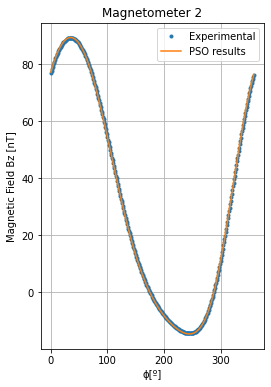

In [188]:
plt.figure(figsize=(4,6))
plt.plot(Bz_meas[:,1]+Bz_PSO1[:,1], '.' , label='Experimental')
plt.plot(Bz_PSO2[:,1]+Bz_PSO1[:,1] , label='PSO results')
plt.legend()
plt.grid()
plt.title('Magnetometer 2')
plt.xlabel('ϕ[º]')
plt.ylabel('Magnetic Field Bz [nT]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Bz-mg2_Simulation2-v2.svg')
#plt.xlim([720,180])
plt.show()

In [164]:
Bx=Bx_meas[:,1]+Bx_PSO1[:,1]
By=By_meas[:,1]+By_PSO1[:,1]
Bz=Bz_meas[:,1]+Bz_PSO1[:,1]

Bx_PSO=Bx_PSO2[:,1]+Bx_PSO1[:,1]
By_PSO=By_PSO2[:,1]+By_PSO1[:,1]
Bz_PSO=Bz_PSO2[:,1]+Bz_PSO1[:,1]

In [181]:
Bx_error=(Bx-Bx_PSO)/(Bx+1e-4)*1e2
By_error=(By-By_PSO)/(By+1e-4)*1e2
Bz_error=(Bz-Bz_PSO)/(Bz+1e-4)*1e2

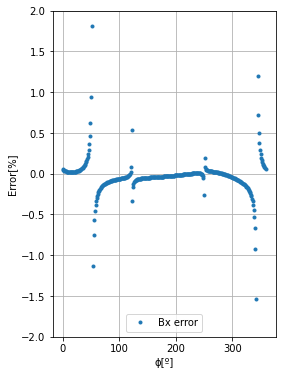

In [182]:
plt.figure(figsize=(4,6))
plt.plot(Bx_error, '.', label='Bx error')
plt.legend()
plt.grid()
plt.ylim([-2,2])
plt.xlabel('ϕ[º]')
plt.ylabel('Error[%]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Error_Bx-mg2_Simulation2-v2.svg')
plt.show()

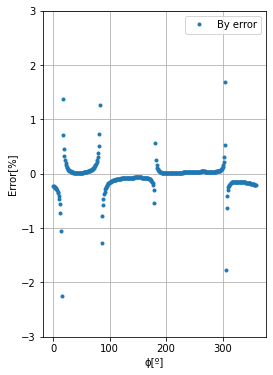

In [183]:
plt.figure(figsize=(4,6))
plt.plot(By_error, '.', label='By error')
plt.legend()
plt.grid()
plt.ylim([-3,3])
plt.xlabel('ϕ[º]')
plt.ylabel('Error[%]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Error_By-mg2_Simulation2-v2.svg')
plt.show()

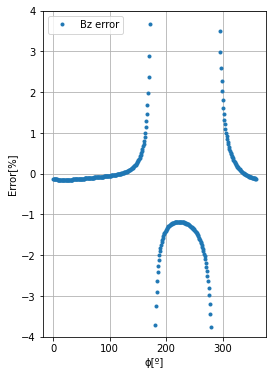

In [185]:
plt.figure(figsize=(4,6))
plt.plot(Bz_error, '.', label='Bz error')
plt.legend()
plt.grid()
plt.ylim([-4,4])
plt.xlabel('ϕ[º]')
plt.ylabel('Error[%]')
plt.savefig('./OUTPUT_DATA_FILES/FIGURES/PSO_Solution_Magnetic_Field_Error_Bz-mg2_Simulation2-v2.svg')
plt.show()